In [ ]:
#breast cancer
#Priyansh 60009220221
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Breast_cancer_data (1).csv")

df.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


**The class label is diagnosis**

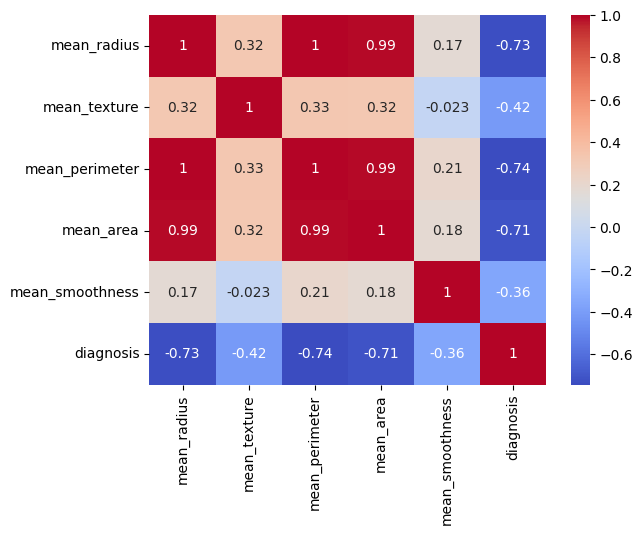

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.show()

In [ ]:
df = df.drop("mean_area", axis=1)
df = df.drop("mean_perimeter", axis=1)
df.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


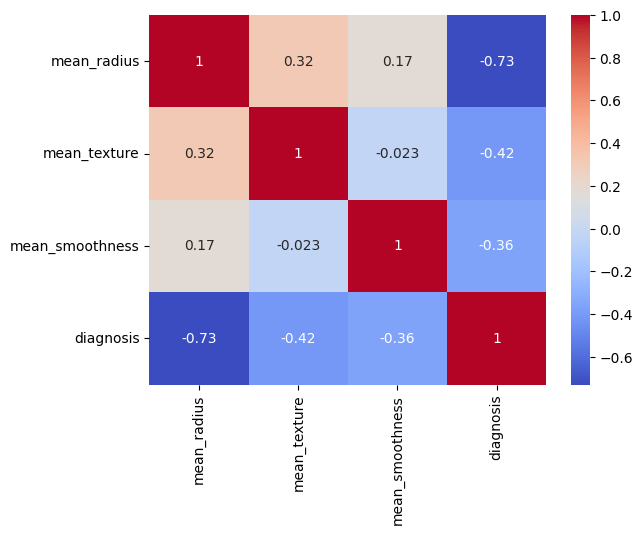

In [ ]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.show()

In [ ]:
columns = ['mean_radius', 'mean_texture', 'mean_smoothness']

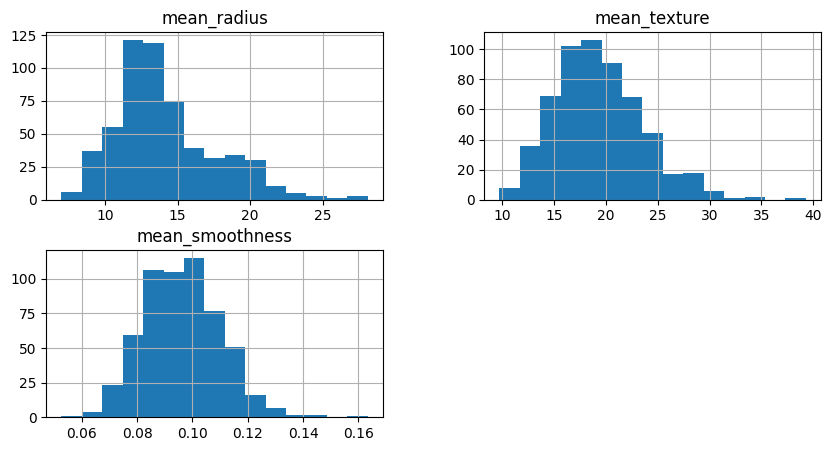

In [ ]:
df[columns].hist(figsize=(10, 5), bins=15)
plt.show()

In [ ]:
df.describe()

,mean_radius,mean_texture,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.627417
std,3.524049,4.301036,0.014064,0.483918
min,6.981000,9.710000,0.052630,0.000000
25%,11.700000,16.170000,0.086370,0.000000
50%,13.370000,18.840000,0.095870,1.000000
75%,15.780000,21.800000,0.105300,1.000000
max,28.110000,39.280000,0.163400,1.000000


In [ ]:
def calculate_prior(df, Y):
  classes = sorted(list(df[Y].unique()))
  prior = []
  for i in classes:
    prior.append(len(df[df[Y] == i]) / len(df))
  return prior

In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
  feat = list(df.columns)
  df = df[df[Y] == label]
  mean, std = df[feat_name].mean(), df[feat_name].std()
  p_x_given_y = (1 / (np.sqrt(2*np.pi) * std)) * np.exp(-((feat_val-mean) ** 2 / (2 * std ** 2)))
  return p_x_given_y

In [ ]:
def naive_bayes_gaussian(df, X, Y):

  features = list(df.columns)[:-1]

  prior = calculate_prior(df, Y)
  Y_pred = []

  for x in X:
    labels = sorted(list(df[Y].unique()))
    likelihood = [1]*len(labels)
    for j in range(len(labels)):
      for i in range(len(features)):
        likelihood[j] = calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

    post_prob = [1] * len(labels)
    for j in range(len(labels)):
      post_prob[j] = likelihood[j] * prior[j]
    Y_pred.append(np.argmax(post_prob))

  return np.array(Y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
train, test = train_test_split(df, test_size=0.2, random_state=41)

X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values
Y_pred = naive_bayes_gaussian(train, X = X_test, Y = 'diagnosis')

print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[16 24]
 [19 55]]
0.7189542483660132


In [ ]:
#social network dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset_2 = pd.read_csv("/content/Social_Network_Ads.csv")

dataset_2.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


<ipython-input-71-1144ed4ea498>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset_2.corr()


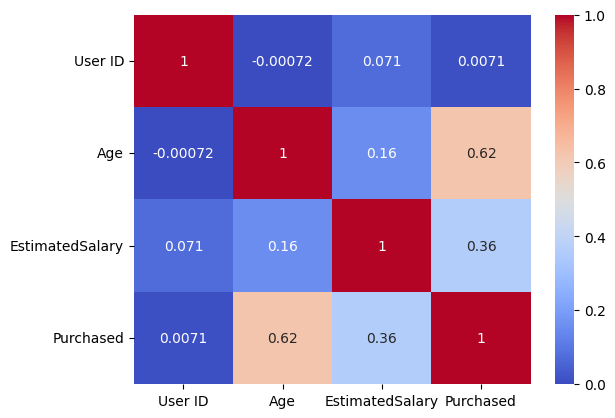

In [ ]:
corr = dataset_2.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
le = LabelEncoder()
dataset_2['Gender'] = le.fit_transform(dataset_2["Gender"])

In [ ]:
X = dataset_2.drop("Purchased", axis=1)
y = dataset_2["Purchased"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nbc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
F1 Score: 0.88


In [ ]:
#credit card dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset_3 = pd.read_csv("/content/german_credit_data.csv")

dataset_3.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


<ipython-input-80-e08f4f3a0def>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset_3.corr()


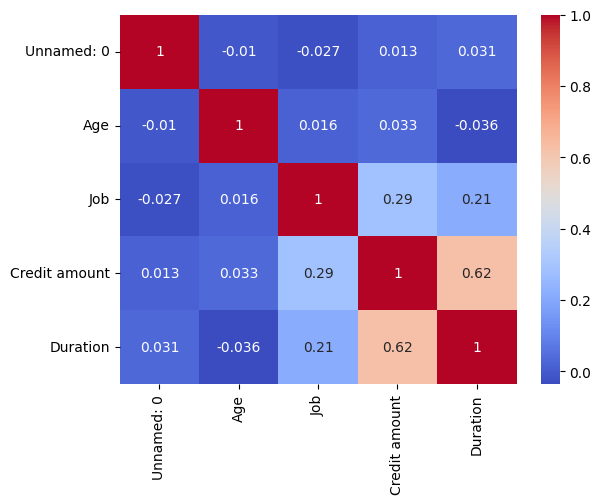

In [ ]:
corr = dataset_3.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
le = LabelEncoder()

for column in columns:
  dataset_3[column] = le.fit_transform(dataset_3[column])

In [ ]:
X = dataset_3.drop("Risk", axis=1)
y = dataset_3["Risk"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nbc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

Accuracy: 0.71
F1 Score: 0.6925999999999999
